In [1]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

lasso_df = pd.read_csv('data/LASSO-data-set.csv')

In [2]:
lasso_df

,strength,dexterity,constitution,wisdom,intelligence,charisma,weight,height,modifier1,modifier2,modifier3,modifier4,modifier5,modifier6,modifier7,modifier8,score
0,156,181,54,61,159,60,170,58,56,60,56,60,6,4,4,4,652.566513
1,148,137,89,147,159,79,166,84,47,44,53,49,11,10,5,8,413.145270
2,164,144,79,143,164,84,175,80,51,56,53,56,7,13,12,8,510.830805
3,176,53,84,178,198,85,180,88,37,38,40,36,5,5,0,5,392.261796
4,164,86,86,75,185,93,180,89,45,47,46,48,-1,2,-1,3,472.258696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,147,136,71,183,178,74,164,73,49,54,49,53,13,15,9,10,469.795129
996,180,155,67,162,163,67,173,62,27,22,28,23,5,2,9,7,402.313429
997,191,119,68,193,192,65,173,67,42,33,36,38,9,10,8,5,480.564293
998,160,167,70,92,162,69,175,72,58,64,64,63,1,-1,-1,1,642.229907


### Split up dependent and independent variables.

In [3]:
dependent_var = lasso_df[['score']].copy()

independent_var = lasso_df.drop(columns = ['score'])

### Run model optimization

In [4]:
X = independent_var
y = dependent_var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

lasso_reg_cv = linear_model.LassoCV(cv = 10)
lasso_reg_cv.fit(X_train, y_train)
lasso_coef = lasso_reg_cv.coef_
lasso_intercept = lasso_reg_cv.intercept_

C:\Users\Work\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Create equation for lasso cross validation Regression

In [5]:
lasso_equation = f'y = {lasso_intercept}'
for i,c in enumerate(lasso_coef):
    sign = "-" if c < 0 else "+"
    lasso_equation = lasso_equation + f' {sign} ({abs(c)} * {independent_var.columns[i]})'
print(lasso_equation)

y = -66.22924695707854 + (0.0 * strength) - (0.0006721759765476589 * dexterity) + (0.0 * constitution) + (0.0 * wisdom) + (0.0 * intelligence) - (0.005375135067364246 * charisma) + (3.9795950474309674 * weight) - (4.992722064393377 * height) + (0.0 * modifier1) + (0.0 * modifier2) + (0.01987464696976759 * modifier3) + (5.977641964349889 * modifier4) + (0.0 * modifier5) - (0.006061428168212141 * modifier6) + (0.0 * modifier7) - (6.868311570279582 * modifier8)


### Plot the various alphas attempted

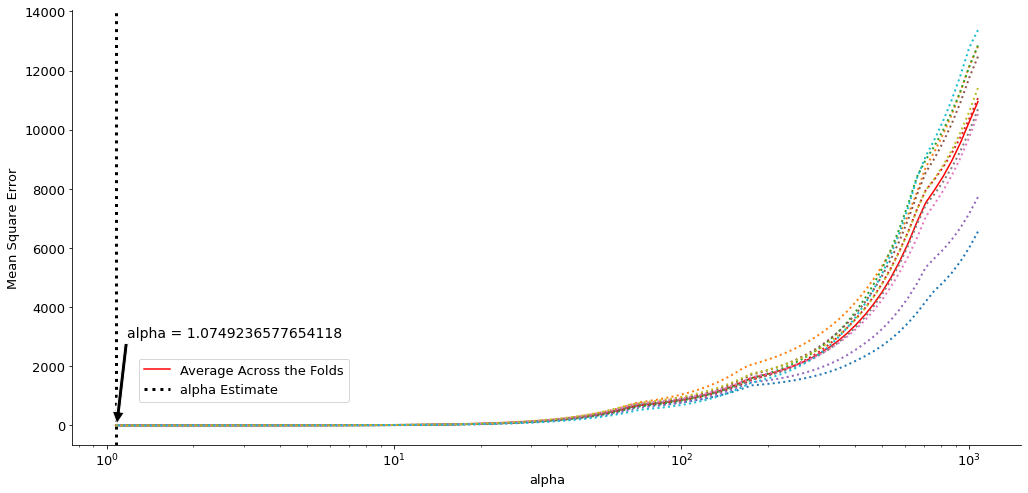

In [6]:
fig = plt.figure(figsize = (17,8))

ax = sns.lineplot(x = lasso_reg_cv.alphas_, y = lasso_reg_cv.mse_path_.mean(axis=-1), color = 'red', label = 'Average Across the Folds')
ax = plt.axvline(lasso_reg_cv.alpha_, color = 'black', linewidth = 3, linestyle =  "dotted", label = 'alpha Estimate')
ax = plt.semilogx(lasso_reg_cv.alphas_, lasso_reg_cv.mse_path_, linewidth = 2, linestyle = ":")
plt.annotate(f'alpha = {lasso_reg_cv.alpha_}', xy = (lasso_reg_cv.alpha_ + .01,-1), xytext = (lasso_reg_cv.alpha_ + .1 ,3000), fontsize = 14, arrowprops = dict(facecolor = 'black', edgecolor = 'white', shrink = .02))
plt.xlabel('alpha', fontsize = 13)
plt.ylabel('Mean Square Error', fontsize = 13)
plt.xticks(size = 13)
plt.yticks(size = 13)
plt.legend(fontsize = 13, loc = (.07,.1))
sns.despine()

In [7]:
alpha_result = lasso_reg_cv.alpha_

alpha_result

1.0749236577654118

### Predict using lasso cross validation model

In [8]:
lasso_predictions = lasso_reg_cv.predict(X_test)

In [9]:
prediction_results = y_test.copy()
prediction_results['prediction'] = lasso_predictions
prediction_results['residuals'] = prediction_results['score'] - prediction_results['prediction']

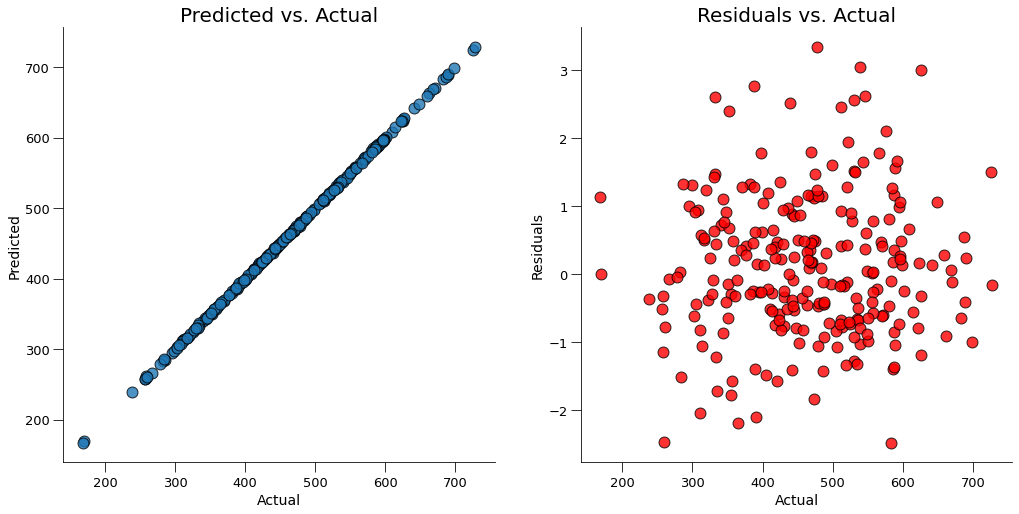

In [10]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13


fig, axs = plt.subplots(1,2, figsize = (17,8))
axs[0].set_title("Predicted vs. Actual", fontsize = 20)
axs[1].set_title("Residuals vs. Actual", fontsize = 20)
sns.scatterplot(data = prediction_results,
                     x = 'score',
                     y = 'prediction',
                     s = 120,
                     alpha = .8, 
                     edgecolor = 'black', 
                     linewidth = 1,
                     legend = False, 
                     ax = axs[0])

sns.scatterplot(data = prediction_results,
                     x = 'score',
                     y = 'residuals',
                     s = 120,
                     alpha = .8, 
                     edgecolor = 'black', 
                     linewidth = 1,
                     legend = False, 
                     color = 'red',
                     ax = axs[1])

axs[0].set_xlabel('Actual', fontsize = 14)
axs[0].set_ylabel('Predicted', fontsize = 14)
axs[0].tick_params(size = 10)
axs[1].tick_params(size = 10)
axs[1].set_xlabel('Actual', fontsize = 14)
axs[1].set_ylabel('Residuals', fontsize = 14)

sns.despine()
plt.show()

## Run a Linear Regression on the Data

In [11]:
mlr = LinearRegression()
mlr.fit(X_train, y_train)

prediction = mlr.predict(X_test)

mlr_score = mlr.score(X_test, y_test)
intercept = mlr.intercept_[0]
coef_list = mlr.coef_

lasso_score = lasso_reg_cv.score(X_test, y_test)
scores = [lasso_score, mlr_score]

### Create Dataframe with prediction results for charting

In [12]:
linear_model_predictions = y_test.copy()
linear_model_predictions['prediction'] = prediction
linear_model_predictions['residuals'] = linear_model_predictions['score'] - linear_model_predictions['prediction']

### Create Charts

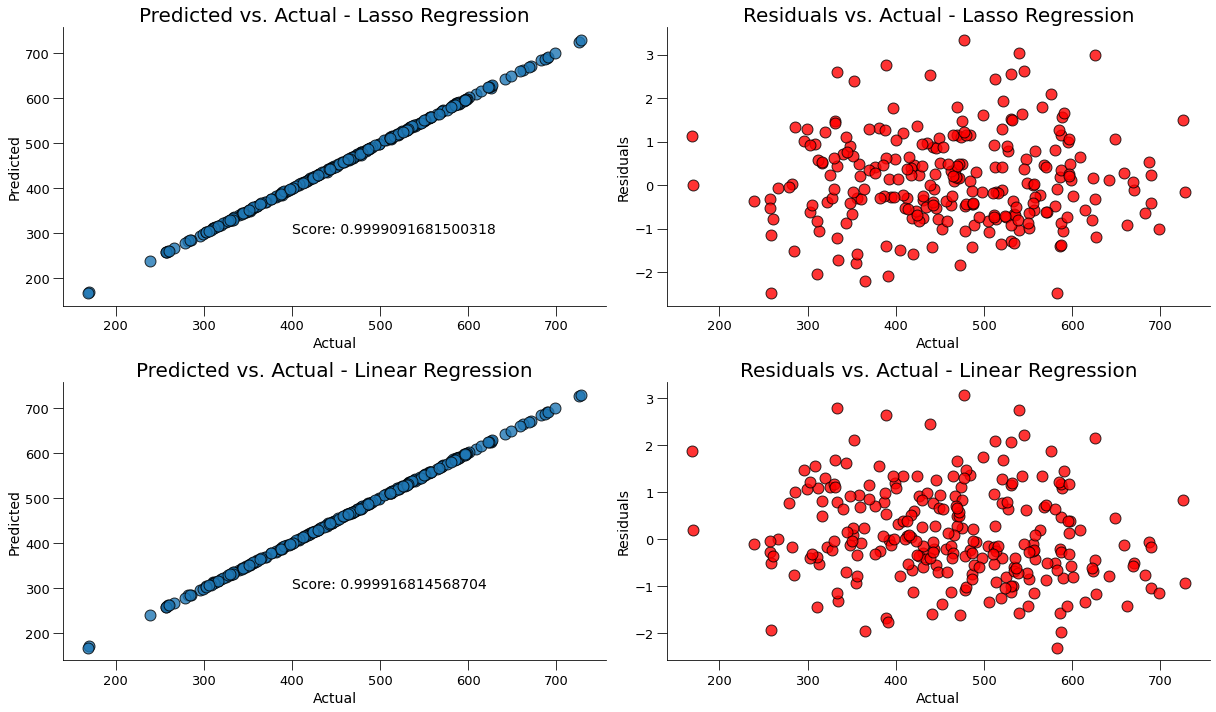

In [13]:
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13


fig, axs = plt.subplots(2,2, figsize = (17,10))
axs[0][0].set_title("Predicted vs. Actual - Lasso Regression", fontsize = 20)
axs[0][1].set_title("Residuals vs. Actual - Lasso Regression", fontsize = 20)
axs[1][0].set_title("Predicted vs. Actual - Linear Regression", fontsize = 20)
axs[1][1].set_title("Residuals vs. Actual - Linear Regression", fontsize = 20)
sns.scatterplot(data = prediction_results,
                     x = 'score',
                     y = 'prediction',
                     s = 120,
                     alpha = .8, 
                     edgecolor = 'black', 
                     linewidth = 1,
                     legend = False, 
                     ax = axs[0][0])

sns.scatterplot(data = prediction_results,
                     x = 'score',
                     y = 'residuals',
                     s = 120,
                     alpha = .8, 
                     edgecolor = 'black', 
                     linewidth = 1,
                     legend = False, 
                     color = 'red',
                     ax = axs[0][1])

sns.scatterplot(data = linear_model_predictions,
                     x = 'score',
                     y = 'prediction',
                     s = 120,
                     alpha = .8, 
                     edgecolor = 'black', 
                     linewidth = 1,
                     legend = False, 
                     ax = axs[1][0])

sns.scatterplot(data = linear_model_predictions,
                     x = 'score',
                     y = 'residuals',
                     s = 120,
                     alpha = .8, 
                     edgecolor = 'black', 
                     linewidth = 1,
                     legend = False, 
                     color = 'red',
                     ax = axs[1][1])

for i,ax in enumerate(axs):
    ax[0].set_xlabel('Actual', fontsize = 14)
    ax[0].set_ylabel('Predicted', fontsize = 14)
    ax[0].tick_params(size = 10)
    ax[0].annotate(f'Score: {scores[i]}', xy = (200,400), xytext = (400,300), fontsize = 14)
    ax[1].tick_params(size = 10)
    ax[1].set_xlabel('Actual', fontsize = 14)
    ax[1].set_ylabel('Residuals', fontsize = 14)

sns.despine()
plt.tight_layout()
plt.show()

In [14]:
mlr_equation = f'y = {intercept}'
for i,c in enumerate(coef_list[0]):
    sign = "-" if c < 0 else "+"
    mlr_equation = mlr_equation + f' {sign} ({abs(c)} * {independent_var.columns[i]})'
print(mlr_equation)

y = -69.42199849114922 - (0.00463360466078709 * strength) - (0.0012989146247264056 * dexterity) + (0.006306866325340293 * constitution) + (7.44404105176374e-05 * wisdom) + (0.0001665086595712016 * intelligence) + (0.00017183156492542868 * charisma) + (4.007954023146727 * weight) - (5.011237571447854 * height) - (0.012349690809662583 * modifier1) - (0.001970637092309428 * modifier2) + (0.009617755441169298 * modifier3) + (6.008969185355361 * modifier4) + (0.009343548558161443 * modifier5) - (0.00632294100943055 * modifier6) + (0.023804086580548008 * modifier7) - (7.007711475211765 * modifier8)
